![](http://)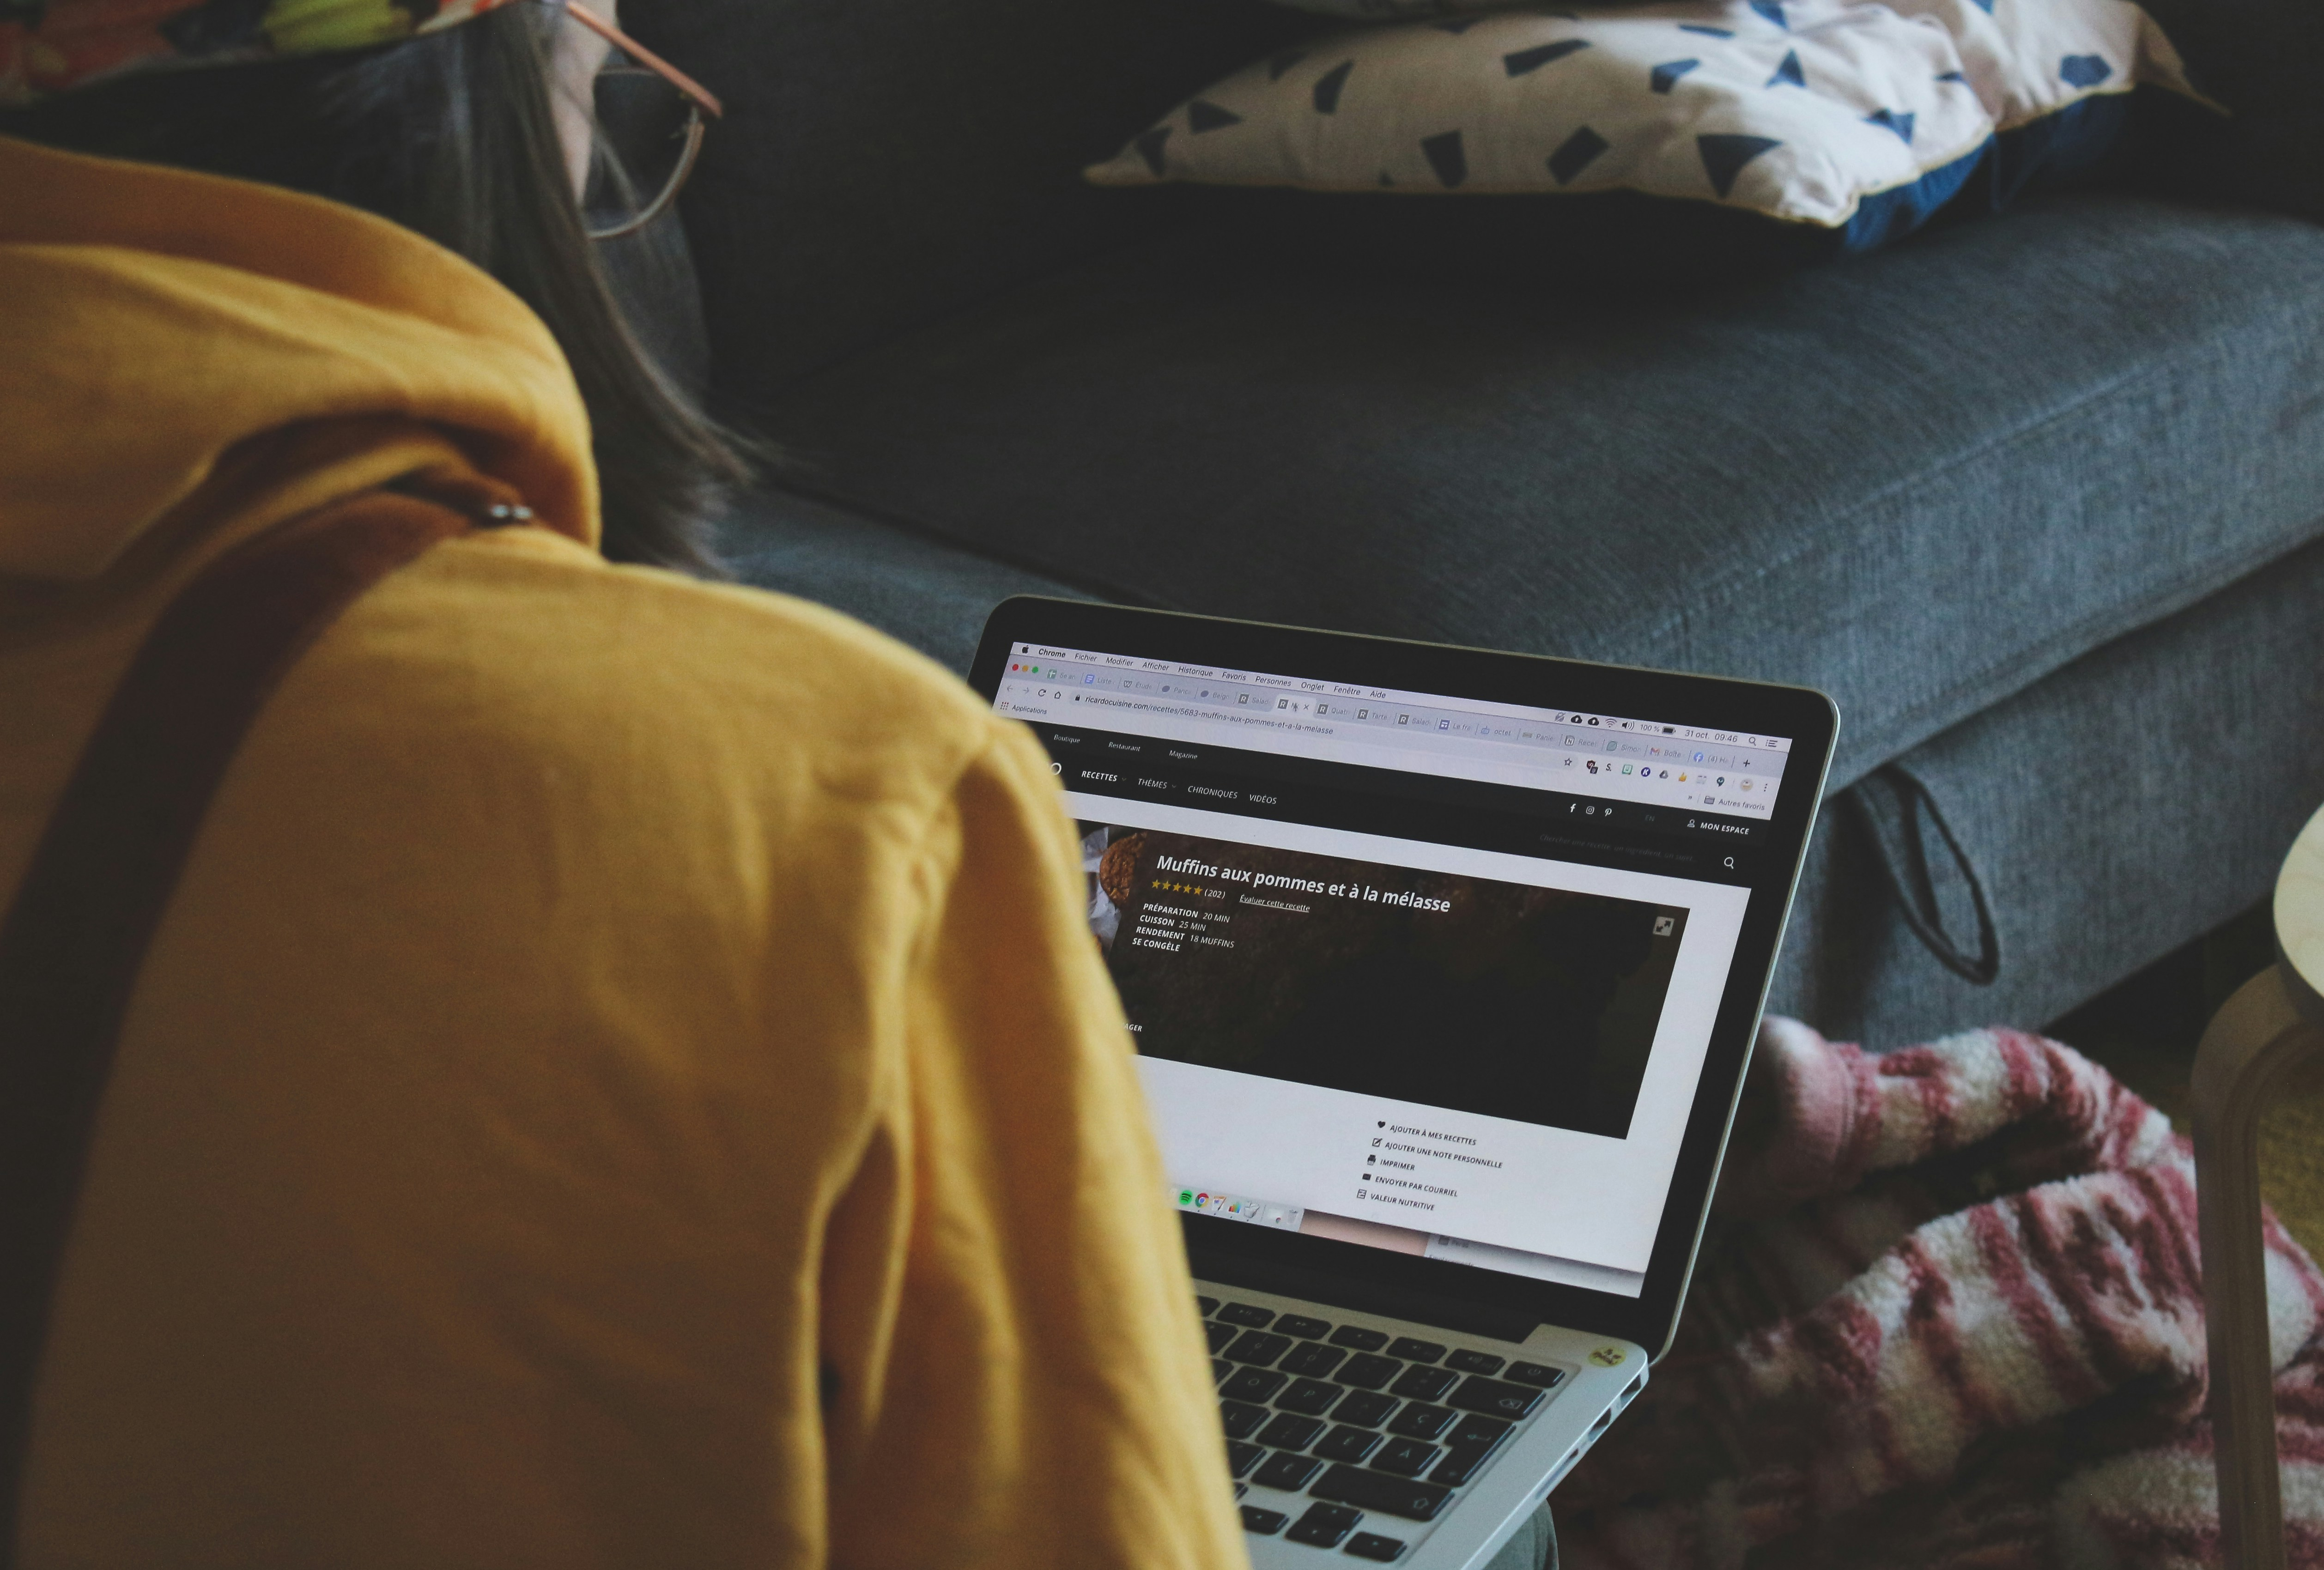

#  **Cyberbullying Detection Model**

Description: Developed a deep learning model to predict whether a tweet contains cyberbullying content. The model leverages advanced Natural Language Processing (NLP) techniques and deep learning architectures to accurately classify tweets.



# **Key Responsibilities:**

**Data Preprocessing:** Labeled dataset of tweets and performed extensive preprocessing, including tokenization, padding, and one-hot encoding to prepare the text data for model training.




**Text Representation:** Used embedding layers to transform the textual data into dense vector representations, capturing semantic meaning and context.




**Model Architecture:** Designed a Long Short-Term Memory (LSTM) network to effectively capture the sequential nature and contextual dependencies of the tweet text.




**Label Encoding:** Employed label encoding to convert categorical labels into numerical form for classification.




**Training and Optimization:** Trained the model using TensorFlow and Keras, optimizing hyperparameters to enhance performance.




**Evaluation:** Evaluated the model's performance using accuracy, precision, recall, and F1 score metrics, ensuring robust and reliable detection of cyberbullying.



# **Technologies Used:**

**Programming Languages:** Python




**Libraries and Frameworks:** TensorFlow, Keras, NumPy, Pandas , Sklearn




**Tools:** Kaggle Notebook




**Outcome:** Successfully developed a high-accuracy model for detecting cyberbullying in tweets, contributing to efforts in promoting safer online communities and mitigating harmful interactions on social media platforms.



  ![](http://)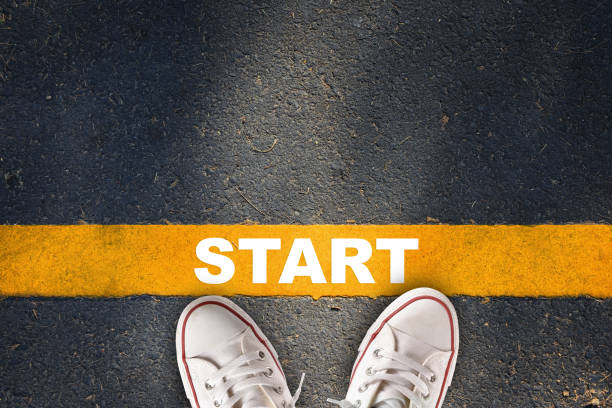 

# **Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# **importing Data**

In [11]:
data = pd.read_csv("/content/cyberbullying_tweets.csv")

In [12]:
data.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


# **Convert the cyberbullying_type to int using label encoder**

In [13]:
le = LabelEncoder()
data["cyberbullying_type"] = le.fit_transform(data["cyberbullying_type"])
data.head()


,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",3
1,Why is #aussietv so white? #MKR #theblock #ImA...,3
2,@XochitlSuckkks a classy whore? Or more red ve...,3
3,"@Jason_Gio meh. :P thanks for the heads up, b...",3
4,@RudhoeEnglish This is an ISIS account pretend...,3


now we'll tokenize the data


# **Importing Essential liberaries**

In [14]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.layers import LSTM, Dense,Dropout, Bidirectional
from tensorflow.keras import Sequential
from tensorflow.keras.utils import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding

# **Converting Texts To Vector using Tokenizer**

In [15]:
tokenizer = Tokenizer()

tokenizer.fit_on_texts(data["tweet_text"])

#tokenizer.word_index

**Maximum words length**

In [16]:
max_word = len(tokenizer.word_index)
max_word

64677

**Maximum length from tweet_text column**

In [17]:
max_len = max([len(x.split()) for x in data["tweet_text"]])
max_len


790

# **Padding**

In [18]:
pad_sequences(tokenizer.texts_to_sequences(data["tweet_text"]),maxlen=max_len)

array([[    0,     0,     0, ...,    19, 25052,    79],
       [    0,     0,     0, ..., 13645, 25055,   340],
       [    0,     0,     0, ...,   919, 11442,  7969],
       ...,
       [    0,     0,     0, ...,   377,   287,    23],
       [    0,     0,     0, ...,   110,    28,   137],
       [    0,     0,     0, ...,    44,    93,   346]], dtype=int32)

In [19]:
x = pad_sequences(tokenizer.texts_to_sequences(data["tweet_text"]),maxlen=max_len)
y = data["cyberbullying_type"]

In [20]:
x.shape

(47692, 790)

In [21]:
y.shape

(47692,)

# **ONE HOT ENCODING**

In [22]:
from tensorflow.keras.utils import to_categorical

y = to_categorical(y ,num_classes = 791)

In [23]:
y.shape

(47692, 791)

# **Splitting data into train and test**

In [24]:
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.2)

# **Building Model**

In [26]:
model = Sequential()

model.add(Embedding(max_word+1,100,input_length=max_len))
model.add(LSTM(150))
model.add(Dense(791,activation="softmax"))
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])


# **Training Model**

In [27]:
history = model.fit(x_train, y_train, batch_size=75, epochs=5 , validation_data=(x_test, y_test))

Epoch 1/5

509/509 [==============================] - 60s 112ms/step - loss: 1.7630 - accuracy: 0.2868 - val_loss: 1.2344 - val_accuracy: 0.4876

Epoch 2/5

509/509 [==============================] - 33s 65ms/step - loss: 0.7081 - accuracy: 0.7338 - val_loss: 0.5290 - val_accuracy: 0.7917

Epoch 3/5

509/509 [==============================] - 30s 60ms/step - loss: 0.5038 - accuracy: 0.8160 - val_loss: 0.6702 - val_accuracy: 0.7375

Epoch 4/5

509/509 [==============================] - 29s 57ms/step - loss: 0.3610 - accuracy: 0.8675 - val_loss: 0.5075 - val_accuracy: 0.8110

Epoch 5/5

509/509 [==============================] - 29s 57ms/step - loss: 0.2333 - accuracy: 0.9088 - val_loss: 0.5355 - val_accuracy: 0.8024


**Accuracy = 0.9088**

# **Prediction on new text**

In [56]:

import numpy as np
text = "Enter here input whatever you want to predict is that input is cyberbullying or not"
seq = tokenizer.texts_to_sequences([text])
padded = pad_sequences(seq, maxlen=max_len)
pred = model.predict(padded)
pred_class = np.argmax(pred)
print(le.inverse_transform([pred_class]))


1/1 [==============================] - 0s 25ms/step

['not_cyberbullying']
